In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import yfinance as yf

In [2]:
# matplotlib Setting
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [3]:
from backdata import tickers, start_year, start_month, start_day, end_year, end_month, end_day

start_date = str(start_year) + '-' + str(start_month) + '-' + str(start_day)
end_date = str(end_year) + '-' + str(end_month) + '-' + str(end_day)

In [4]:
tickers = tickers

In [5]:
ohlc = yf.download(tickers, start = start_date)
prices = ohlc["Adj Close"].dropna(how="all")

[*********************100%***********************]  26 of 26 completed


In [6]:
df = prices[prices.index >= start_date]
df

,AAPL,AMT,AMZN,BHP,BOTZ,BRK-B,CMG,CVX,EQIX,GOOGL,...,RTX,SCHD,SO,TSLA,UNH,UPS,VOO,VTI,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,12.540046,48.573853,8.951500,41.041008,NaN,77.680000,341.269989,71.152672,80.479630,16.651901,...,36.344601,19.264133,27.804966,1.872000,43.644592,53.987942,95.837311,53.753109,47.333103,55.358440
2012-01-04,12.607438,49.275917,8.875500,41.057487,NaN,76.800003,348.750000,71.030159,80.209343,16.723724,...,36.534451,19.264133,27.786444,1.847333,44.280308,53.754959,96.001686,53.777832,46.846672,55.371307
2012-01-05,12.747405,49.845818,8.880500,40.283428,NaN,76.930000,350.480011,70.333954,83.269875,16.491741,...,36.183960,19.249548,27.749397,1.808000,44.576984,53.230827,96.314034,54.016876,46.619141,55.203941
2012-01-06,12.880666,49.763222,9.130500,39.772892,NaN,76.389999,348.950012,69.824623,83.405006,16.266768,...,35.974636,19.162052,27.465364,1.794000,44.738033,53.492886,96.116768,53.893242,46.289623,54.791950
2012-01-09,12.860233,49.903645,8.928000,39.915619,NaN,76.290001,339.739990,70.585358,85.654694,15.577077,...,36.071999,19.205801,27.755577,1.816667,44.687172,53.471054,96.264709,54.016876,46.430851,55.036575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-13,153.839996,254.630005,126.820000,52.180000,20.070000,278.290009,1701.060059,159.410004,636.270020,104.320000,...,83.720001,71.699997,78.230003,292.130005,513.960022,192.710007,361.380005,197.770004,135.220001,95.330002
2022-09-14,155.309998,251.820007,128.550003,52.020000,20.049999,278.420013,1721.489990,163.270004,626.679993,105.000000,...,86.400002,71.760002,79.430000,302.609985,509.769989,190.960007,362.730011,198.539993,134.919998,97.669998
2022-09-15,152.369995,245.059998,126.279999,51.680000,19.790001,276.700012,1710.650024,160.619995,616.320007,102.910004,...,85.610001,71.190002,77.290001,303.750000,522.909973,185.000000,358.679993,196.419998,133.470001,94.830002


In [7]:
daily_ret = df.pct_change()  # 종목 수정 종가데이터의 일별주가상승률
annual_ret = daily_ret.mean() * 252 # 연평균 주가상승률
daily_cov = daily_ret.cov() # 일별주가상승률의 공분산행렬
annual_cov = daily_cov * 252 # 공분산행렬과 영업일 수의 곱

port_ret = [] # 포트폴리오의 일별주가상승률
port_risk = [] # 리스크
port_weights = [] # 비중
sharpe_ratio = []

In [8]:
for _ in tqdm(range(1000000)): # 임의로 만들 포트폴리오
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights) # 임의의 가중치를 랜덤으로 부여

    returns = np.dot(weights, annual_ret) # 가중치와 연 수익률 행렬과 내적을 실시
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) # 포트폴리오의 변동성의 기댓값을 산출

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)

100%|██████████| 1000000/1000000 [00:35<00:00, 28012.77it/s]


In [9]:
portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(tqdm(tickers)):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in tickers]]
df

100%|██████████| 26/26 [00:04<00:00,  5.44it/s]


,Returns,Risk,Sharpe,BOTZ,SCHD,VOO,VTI,BHP,LIN,GOOGL,...,JNJ,UPS,RTX,AMT,PLD,EQIX,AAPL,MSFT,NEE,SO
0,0.166655,0.168656,0.988134,0.001149,0.020997,0.065999,0.064732,0.049856,0.031123,0.007759,...,0.069288,0.024539,0.038032,0.028936,0.022057,0.048749,0.000705,0.059673,0.031830,0.069451
1,0.193487,0.177908,1.087570,0.080069,0.062743,0.004179,0.049619,0.080312,0.032432,0.048088,...,0.047134,0.044249,0.006849,0.053083,0.014172,0.034642,0.002472,0.019566,0.028446,0.066216
2,0.179709,0.168490,1.066584,0.060852,0.015598,0.046889,0.052408,0.041265,0.071823,0.054880,...,0.006123,0.036819,0.034730,0.024026,0.034921,0.056050,0.040788,0.040130,0.008970,0.041863
3,0.168654,0.169606,0.994383,0.023255,0.034762,0.043070,0.058917,0.068343,0.060006,0.008474,...,0.048312,0.045466,0.038467,0.036470,0.051724,0.019940,0.018033,0.057893,0.039028,0.028724
4,0.166419,0.160013,1.040031,0.063562,0.044023,0.035008,0.068981,0.000130,0.070095,0.048753,...,0.069704,0.058271,0.069982,0.016169,0.018235,0.041719,0.018627,0.012671,0.018073,0.036679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.206471,0.171700,1.202507,0.074083,0.069153,0.033993,0.023929,0.026622,0.069534,0.061250,...,0.008811,0.042626,0.049642,0.067975,0.050168,0.016952,0.045033,0.065955,0.018301,0.042655
999996,0.166370,0.171840,0.968164,0.054660,0.050445,0.018398,0.045647,0.071512,0.005925,0.072137,...,0.020593,0.018758,0.015726,0.024696,0.044011,0.068010,0.078576,0.060772,0.006883,0.051531
999997,0.174000,0.168096,1.035120,0.061589,0.021443,0.049202,0.056248,0.059064,0.059316,0.015132,...,0.017215,0.008885,0.043184,0.023262,0.038630,0.011024,0.061690,0.043482,0.021614,0.045796
999998,0.180745,0.172710,1.046520,0.051869,0.036682,0.013357,0.056239,0.072884,0.031543,0.026425,...,0.035828,0.056183,0.015042,0.041689,0.039357,0.003237,0.075720,0.043201,0.068048,0.030689


In [10]:
min_risk = df.loc[df['Risk'] == df['Risk'].min()]  # Low Risk
max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]  # Max Sharpe

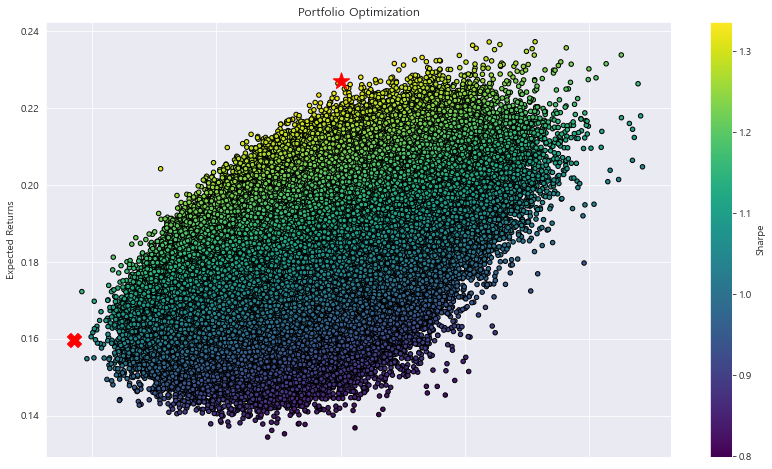

In [11]:
df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis',
                edgecolors='k', grid=True)
# 샤프지수가 가장 큰 포트폴리오
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r',
            marker='*', s=300)
# 리스크가 제일 작은 포트폴리오
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r',
            marker='X', s=200)
plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [12]:
min_risk

,Returns,Risk,Sharpe,BOTZ,SCHD,VOO,VTI,BHP,LIN,GOOGL,...,JNJ,UPS,RTX,AMT,PLD,EQIX,AAPL,MSFT,NEE,SO
246926,0.159552,0.148584,1.073821,0.069092,0.016436,0.040309,0.002861,0.005835,0.065082,0.002754,...,0.039772,0.010029,0.102835,0.005915,0.041162,0.088832,0.102825,0.000723,0.05728,0.028693


In [13]:
max_sharpe

,Returns,Risk,Sharpe,BOTZ,SCHD,VOO,VTI,BHP,LIN,GOOGL,...,JNJ,UPS,RTX,AMT,PLD,EQIX,AAPL,MSFT,NEE,SO
759966,0.227183,0.170057,1.335922,0.087977,0.044684,0.07892,0.022514,0.003001,0.017901,0.070618,...,0.049311,0.024066,0.069585,0.090742,0.061703,0.006956,0.028458,0.013345,0.047722,0.030379


In [14]:
stock_weight_dict = dict(zip(list(max_sharpe[tickers].columns),
                             max_sharpe[tickers].values.flatten().tolist()))
stock_weight_dict

{'BOTZ': 0.08797737829298546,
 'SCHD': 0.044684032809934514,
 'VOO': 0.07892033654343762,
 'VTI': 0.02251436280214192,
 'BHP': 0.0030011249160056095,
 'LIN': 0.017900611648501565,
 'GOOGL': 0.07061822556092473,
 'AMZN': 0.008029798892408702,
 'TSLA': 0.05318141139594111,
 'WMT': 0.0111605315548506,
 'PG': 0.08080127941745303,
 'CMG': 0.0030479997459834634,
 'XOM': 0.004629973910859448,
 'CVX': 0.07874526528703743,
 'BRK-B': 0.007620478091161168,
 'UNH': 0.00490035195981056,
 'JNJ': 0.04931120438002622,
 'UPS': 0.02406590908791045,
 'RTX': 0.06958480009785147,
 'AMT': 0.09074235488185058,
 'PLD': 0.06170296088876098,
 'EQIX': 0.006956456193202526,
 'AAPL': 0.02845768740062453,
 'MSFT': 0.013344737949605385,
 'NEE': 0.047721501757442,
 'SO': 0.030379224533288788}

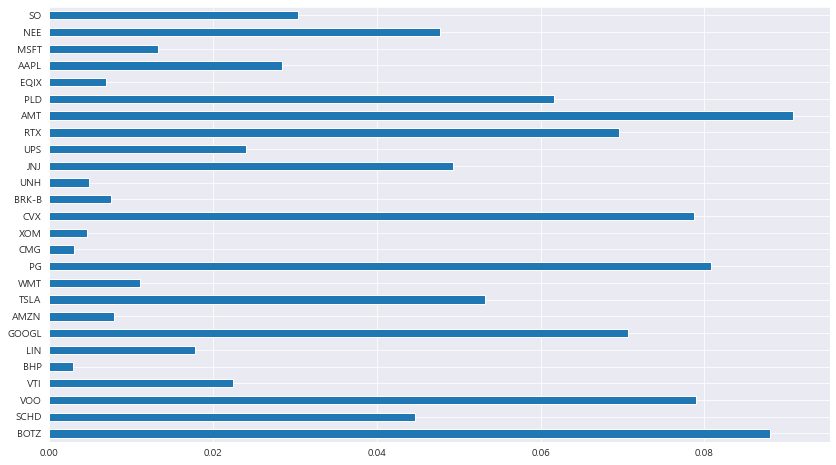

In [15]:
from collections import OrderedDict

weights = OrderedDict(stock_weight_dict)
pd.Series(weights).plot.barh();

In [16]:
def print_orderdict(dict, postfix='%', space=8, title='', line=1):
    print(title)
    idx = 0
    for i in dict:
        idx += 1
        if postfix=='%':
            num = str(round(dict[i]*100, 2))
        else:
            num = str(dict[i])
        print(i.ljust(6), (num+postfix).rjust(space), end="")
        if idx % line == 0:
            print()

In [17]:
# TODO: 투자금 입력
deposit = 8000

In [18]:
from pypfopt.discrete_allocation import DiscreteAllocation

latest_prices = prices.iloc[-1] # 마지막 종가 기준

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=deposit)
allocation, leftover = da.greedy_portfolio()

buy = 0
for k  in allocation:
    buy += latest_prices[k] * allocation[k]

print("Total Asset($): ", deposit)
print("Total buy($): ", round(buy, 2), ", leftover($):", round(deposit - buy, 2))
print_orderdict(allocation,
                postfix=" stk",
                title="** Optimal Weights **")

Total Asset($):  8000
Total buy($):  7968.46 , leftover($): 31.54
** Optimal Weights **
AMT       3 stk
BOTZ     36 stk
PG        5 stk
VOO       2 stk
CVX       4 stk
GOOGL     5 stk
RTX       6 stk
PLD       4 stk
TSLA      2 stk
JNJ       2 stk
NEE       4 stk
SCHD      4 stk
SO        3 stk
AAPL      1 stk
UPS       1 stk
VTI       1 stk
LIN       1 stk
MSFT      1 stk
WMT       1 stk
